# "Продвинутый Python". Магистерская программа ВШЭ.

## *Выполнила Корж Любовь*

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [58]:
from functools import partial
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [59]:
def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    index = -1
    for i in range(len(array)):
        if index == -1 and array[i] == element:
            index = i
        elif index != -1 and array[i] != element:
            array[index], array[i] = array[i], array[index]
            index += 1
    return array[:index] 
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

In [70]:
delete_zeros_from_array([2, 2, 0, 2, 0, 0, 2, 0, 5, 3, 5, 0, 0, 0, 0])

[2, 2, 2, 2, 5, 3, 5]

100%|██████████| 100/100 [00:03<00:00, 25.41it/s]


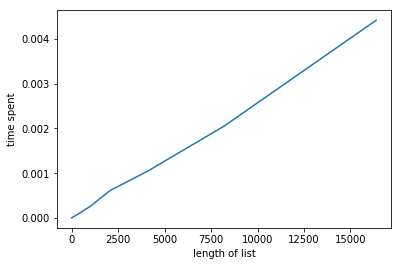

In [88]:
N = 100
import collections
times = collections.defaultdict(float)

for n in range(15):
    t = 2**n

    for i in tqdm(range(N)):
        arr_rand = [random.randint(1, 5) for _ in range(t - t // 3 - 1)]
        arr = [0] * (t // 3 + 1) + arr_rand
        random.shuffle(arr)
        start = time.time()
        delete_zeros_from_array(arr)
        end = time.time()
        times[t] += (end - start) / N

x = [i[0] for i in times.items()]
y = [i[1] for i in times.items()]
fig, ax = plt.subplots(figsize=(6, 4))
ax.set(ylabel='time spent', xlabel='length of list')
plt.plot(x, y);

Время выполнения линейно зависит от размера списка

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [96]:
def min_of_3_complex_numbers(c1, c2, c3):
    c_1, c_2, c_3 = abs(c1), abs(c2), abs(c3)
    if c_1 < c_2 and c_1 < c_3:
        return c1
    elif c_2 <= c_1 and c_2 < c_3:
        return c2
    else:
        return c3

In [102]:
min_of_3_complex_numbers(5 + 6j, 5 - 3j, -5 - 5j)

(5-3j)